# View and Frontend Coding Notes & Hacks

- title: View and Frontend Coding Notes
- toc: true
- branch: master
- badges: true
- comments: true
- categories: [t2]

## Example of CSS Code

In [ ]:
/* example of CSS code in style.css */

@import "{{ site.theme }}";

/* "row style" is flexible size and aligns pictures in center */
.row {
    align-items: center;
    display: flex;
  }
  
  /* "column style" is one-third of the width with padding */
  .column {
    flex: 33.33%; /* creates a row with 3 pictures; 33.3 % of space is taken up by each picture */
    padding: 5px;
  }

## Organization and Design using HTML

- If you want a certain style on just one page, you can put the style code at the top of that markdown file
- Style/visual design: use SASS files in `assets/css/style.css`
- Head and Body: HTML tags used to structure each page
    - layout files: `layouts/default.html`
    - `_includes`allows you to supplement layout
        - ex: `_layouts/home.html` is used to add menu options to pages by including it in`_layouts/default.html`
        - more resources in `readme` of theme page
- Markdown can get generated into HTML for some files
    - ex. jupyter notebook files
    - generated files get placed into `.gitignore`
    - we don't have to version control
    - ex. `_sites` in our CPT project
    

## CRUD Concepts

- Create, Read, Update, Delete
- In database projects, we need to build a system for capturing data
- Frontend view elements correspond to a Backend database
- **Create** new records
- **Read** lists
- **Update** the data
- **Delete** records

## Create: Obtaining Inputs

- obtain data from the user to store
- can use HTML5 tables to organize inputs
    - `th` for labels
    - `td` for input types
    - onclick action

### Obtaining Inputs using HTML Table

In [ ]:
<table>
    <tr>
        <th><label for="name">Name</label></th>
        <th><label for="email">Email</label></th>
        <th><label for="password">Password</label></th>
        <th><label for="phone">Phone</label></th>
    </tr>
    <tr>
        <td><input type="text" name="name" id="name" required></td>
        <td><input type="email" name="email" id="email" placeholder="abc@xyz.org" required></td>
        <td><input type="password" name="password" id="password" required></td>
        <td><input type="tel" name="phone_num" id="phone_num"
            pattern="[0-9]{3}-[0-9]{3}-[0-9]{4}"
            placeholder="999-999-9999"></td>
        <td ><button onclick="create_User()">Create</button></td>
    </tr>
</table>

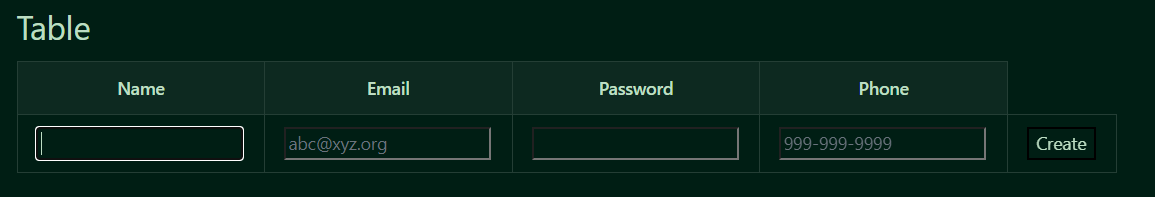

### Obtaining Inputs using HTML5 Another Way

- using `form action=` instead of `onclick=`
- `<p>` for labels and input

In [ ]:
<form action="create_User()">
    <p><label>
        Name:
        <input type="text" name="name" id="name" required>
    </label></p>
    <p><label>
        User ID:
        <input type="text" name="uid" id="uid" required>
    </label></p>
    <p><label>
        Password:
        <input type="password" name="password" id="password" required>
        Verify Password:
        <input type="password" name="passwordV" id="passwordV" required>
    </label></p>
    <p><label>
        Phone:
        <input type="tel" name="phone_num" id="phone_num"
            pattern="[0-9]{3}-[0-9]{3}-[0-9]{4}"
            placeholder="999-999-9999">
    </label></p>
    <p><label>
        Birthday:
        <input type="date" name="dob" id="dob">
    </label></p>
    <p>
        <button>Create</button>
    </p>
</form>

## Hacks

Add new attributes/variables to the Class. Make class specific to your CPT work.

- Add classOf attribute to define year of graduation
    - Add setter and getter for classOf
- Add dob attribute to define date of birth
    - This will require investigation into Python datetime objects as shown in example code below
    - Add setter and getter for dob
- Add instance variable for age, make sure if dob changes age changes
    - Add getter for age, but don't add/allow setter for age
- Update and format tester function to work with changes

Start a class design for each of your own Full Stack CPT sections of your project

- Use new code cell in this notebook
- Define init and self attributes
- Define setters and getters
- Make a tester

In [1]:
from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

dob = date(2004, 12, 14)
age = calculate_age(dob)
print(age)

18


In [8]:
from werkzeug.security import generate_password_hash, check_password_hash
from datetime import date
import json

class User:    

    def __init__(self, name, uid, password, dob, classOf): # also add classOf up here
        self._name = name    # variables with self prefix become part of the object, 
        self._uid = uid
        self.set_password(password)
        self._dob = dob
        self._classOf = classOf # adding classOf attribute to define year of graduation
    
    @property
    def name(self):
        return self._name
    
    # a setter function, allows name to be updated after initial object creation
    @name.setter
    def name(self, name):
        self._name = name
    
    # a getter method, extracts email from object
    @property
    def uid(self):
        return self._uid
    
    # a setter function, allows name to be updated after initial object creation
    @uid.setter
    def uid(self, uid):
        self._uid = uid
        
    # check if uid parameter matches user id in object, return boolean
    def is_uid(self, uid):
        return self._uid == uid
    
    # dob property is returned as string, to avoid unfriendly outcomes
    @property
    def dob(self):
        dob_string = self._dob.strftime('%m-%d-%Y')
        return dob_string
    
    # dob should be have verification for type date
    @dob.setter
    def dob(self, dob):
        self._dob = dob
        
    # age is calculated and returned each time it is accessed
    @property
    def age(self):
        today = date.today()
        return today.year - self._dob.year - ((today.month, today.day) < (self._dob.month, self._dob.day))
    
    @property
    def classOf(self):
        return self._classOf
    
    # add setter function for classOf
    @classOf.setter
    def classOf(self, classOf):
        self._classOf = classOf
        
    # dictionary is customized, removing password for security purposes
    @property
    def dictionary(self):
        dict = {
            "name" : self.name,
            "uid" : self.uid,
            "dob" : self.dob,
            "age" : self.age,
            "class of" : self.classOf # update dictionary by adding classOf
        }
        return dict
    
    
    # update password, this is conventional setter
    def set_password(self, password):
        """Create a hashed password."""
        self._password = generate_password_hash(password, method='sha256')

    # check password parameter versus stored/encrypted password
    def is_password(self, password):
        """Check against hashed password."""
        result = check_password_hash(self._password, password)
        return result
    
    # output content using json dumps, this is ready for API response
    def __str__(self):
        return json.dumps(self.dictionary)
    
    # output command to recreate the object, uses attribute directly
    def __repr__(self):
        return f'User(name={self._name}, uid={self._uid}, password={self._password}, dob={self._dob}, class of={self._classOf})' # update by adding classOf
    

if __name__ == "__main__":
    u1 = User(name='Thomas Edison', uid='toby', password='123toby', dob=date(1847, 2, 11), classOf='1872')
    u2 = User(name='Shreya Sapkal', uid="rev", password='password', dob=date(2001, 1, 1), classOf='2023') # set new user, which is me
    
    print("JSON ready string:\n", u1, "\n") 
    print("Raw Variables of object:\n", vars(u1), "\n") 
    print("Raw Attributes and Methods of object:\n", dir(u1), "\n")
    print("Representation to Re-Create the object:\n", repr(u1), "\n") 
    
    print("JSON ready string:\n", u2, "\n") # call new user data
    print("Raw Variables of object:\n", vars(u2), "\n") 
    print("Raw Attributes and Methods of object:\n", dir(u2), "\n")
    print("Representation to Re-Create the object:\n", repr(u2), "\n") 

JSON ready string:
 {"name": "Thomas Edison", "uid": "toby", "dob": "02-11-1847", "age": 175, "class of": "1872"} 

Raw Variables of object:
 {'_name': 'Thomas Edison', '_uid': 'toby', '_password': 'sha256$GFUWF3ToPQuZWZet$72af6b0d2680dde18cf67ff67ae2ec1c9078d15cf61855e8e431b9fd26b78a25', '_dob': datetime.date(1847, 2, 11), '_classOf': '1872'} 

Raw Attributes and Methods of object:
 ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_classOf', '_dob', '_name', '_password', '_uid', 'age', 'classOf', 'dictionary', 'dob', 'is_password', 'is_uid', 'name', 'set_password', 'uid'] 

Representation to Re-Create the object:
 User(name=Thomas Edison, uid=toby, password=sha256$GFUWF3ToPQuZWZet$72af6b0d2680

### CPT Connection

In [9]:
from werkzeug.security import generate_password_hash, check_password_hash
from datetime import date
import json

class User:    

    def __init__(self, name, uid, password, carType):
        self._name = name    # variables with self prefix become part of the object, 
        self._uid = uid
        self.set_password(password)
        self._carType = carType # will store what car type a person chooses (gas vs. electric) so we can show it as stats for site visitors
    
    @property
    def name(self):
        return self._name
    
    # a setter function, allows name to be updated after initial object creation
    @name.setter
    def name(self, name):
        self._name = name
    
    # a getter method, extracts email from object
    @property
    def uid(self):
        return self._uid
    
    # a setter function, allows name to be updated after initial object creation
    @uid.setter
    def uid(self, uid):
        self._uid = uid
        
    # check if uid parameter matches user id in object, return boolean
    def is_uid(self, uid):
        return self._uid == uid

    @property
    def carType(self):
        return self._carType
    
    # a setter function, allows classOf to be updated after initial object creation
    @carType.setter
    def name(self, carType):
        self._carType = carType
    
    # dictionary is customized, removing password for security purposes
    @property
    def dictionary(self):
        dict = {
            "name" : self.name,
            "uid" : self.uid,
            "selected car type" :  self.carType
        }
        return dict
    
    # update password, this is conventional setter
    def set_password(self, password):
        """Create a hashed password."""
        self._password = generate_password_hash(password, method='sha256')

    # check password parameter versus stored/encrypted password
    def is_password(self, password):
        """Check against hashed password."""
        result = check_password_hash(self._password, password)
        return result
        
    
    # output content using json dumps, this is ready for API response
    def __str__(self):
        return json.dumps(self.dictionary)
    
    # output command to recreate the object, uses attribute directly
    def __repr__(self):
        return f'User(name={self._name}, uid={self._uid}, password={self._password}, selected car type={self._carType})'
    

if __name__ == "__main__":
    u1 = User(name='Thomas Edison', uid='toby', password='123toby', carType='electric')
    u2 = User(name='Shreya Sapkal', uid='rev', password='password', carType='gasoline')
    
    print("JSON ready string:\n", u1, "\n") 
    print("Raw Variables of object:\n", vars(u1), "\n") 
    print("Raw Attributes and Methods of object:\n", dir(u1), "\n")
    print("Representation to Re-Create the object:\n", repr(u1), "\n") 

    print("JSON ready string:\n", u2, "\n") 
    print("Raw Variables of object:\n", vars(u2), "\n") 
    print("Raw Attributes and Methods of object:\n", dir(u2), "\n")
    print("Representation to Re-Create the object:\n", repr(u2), "\n") 

JSON ready string:
 {"name": "electric", "uid": "toby", "selected car type": "electric"} 

Raw Variables of object:
 {'_name': 'Thomas Edison', '_uid': 'toby', '_password': 'sha256$rZsNQtnEOOY3T1bw$047a350a9a4dfdd9fea899573267f93cd867758f0bb99c69e3bd19a1c8de3b0a', '_carType': 'electric'} 

Raw Attributes and Methods of object:
 ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_carType', '_name', '_password', '_uid', 'carType', 'dictionary', 'is_password', 'is_uid', 'name', 'set_password', 'uid'] 

Representation to Re-Create the object:
 User(name=Thomas Edison, uid=toby, password=sha256$rZsNQtnEOOY3T1bw$047a350a9a4dfdd9fea899573267f93cd867758f0bb99c69e3bd19a1c8de3b0a, selected car type=electri

- something I want to add: code segment that counts up how many users chose gasoline for car type and how many chose electric
- way to display comparison of how many users have chosen each type